## Applied Statistics 

### Turma 9DTSR

### Trabalho prático usando Python
 
 
### Regressão Logística - Modelo de Inadimplência PF


### Regressão Logística binária
### Variável resposta é binária (0 ou 1)

### Exemplos: 

### (1) Cliente inadimplente igual a 1 e 0 caso contrário (c.c.); 

### (2) Cliente cancelou o produto igual a 1 e 0 c.c.;

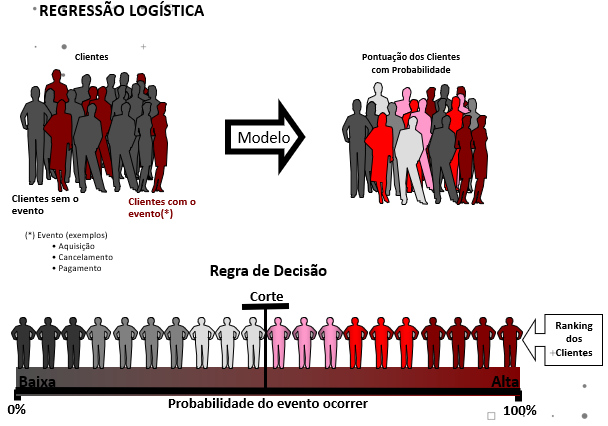

### Segmento Cartão de Crédito

### A área de crédito deseja  avaliar  a propensão ao risco  de seus clientes e implementar políticas de redução da inadimplência 

### Dicionário de variáveis

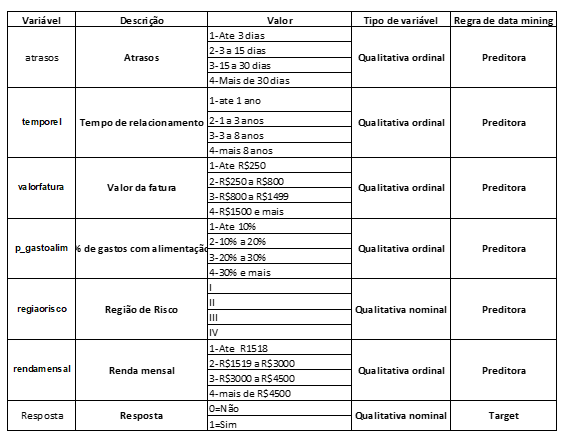

In [1]:
# Importar as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importar os dados
df = pd.read_csv('arq_inadimplencia.csv',sep= ";")

In [3]:
df.head()

,cliente,atrasos,Resposta,temporel,valorfatura,p_gastoalim,regiaorisco,rendamensal
0,1,4,1,2,4,4,2,4
1,2,1,0,4,1,1,3,3
2,3,1,0,4,3,2,2,2
3,4,2,1,2,4,4,1,3
4,5,2,0,1,4,1,2,3


### Pre-processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25984 entries, 0 to 25983
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente      25984 non-null  int64
 1   atrasos      25984 non-null  int64
 2   Resposta     25984 non-null  int64
 3   temporel     25984 non-null  int64
 4   valorfatura  25984 non-null  int64
 5   p_gastoalim  25984 non-null  int64
 6   regiaorisco  25984 non-null  int64
 7   rendamensal  25984 non-null  int64
dtypes: int64(8)
memory usage: 1.6 MB


In [5]:
# Selecionar as variáveis preditoras qualitativas
var_cat =['atrasos','temporel', 'valorfatura','p_gastoalim','regiaorisco','rendamensal']

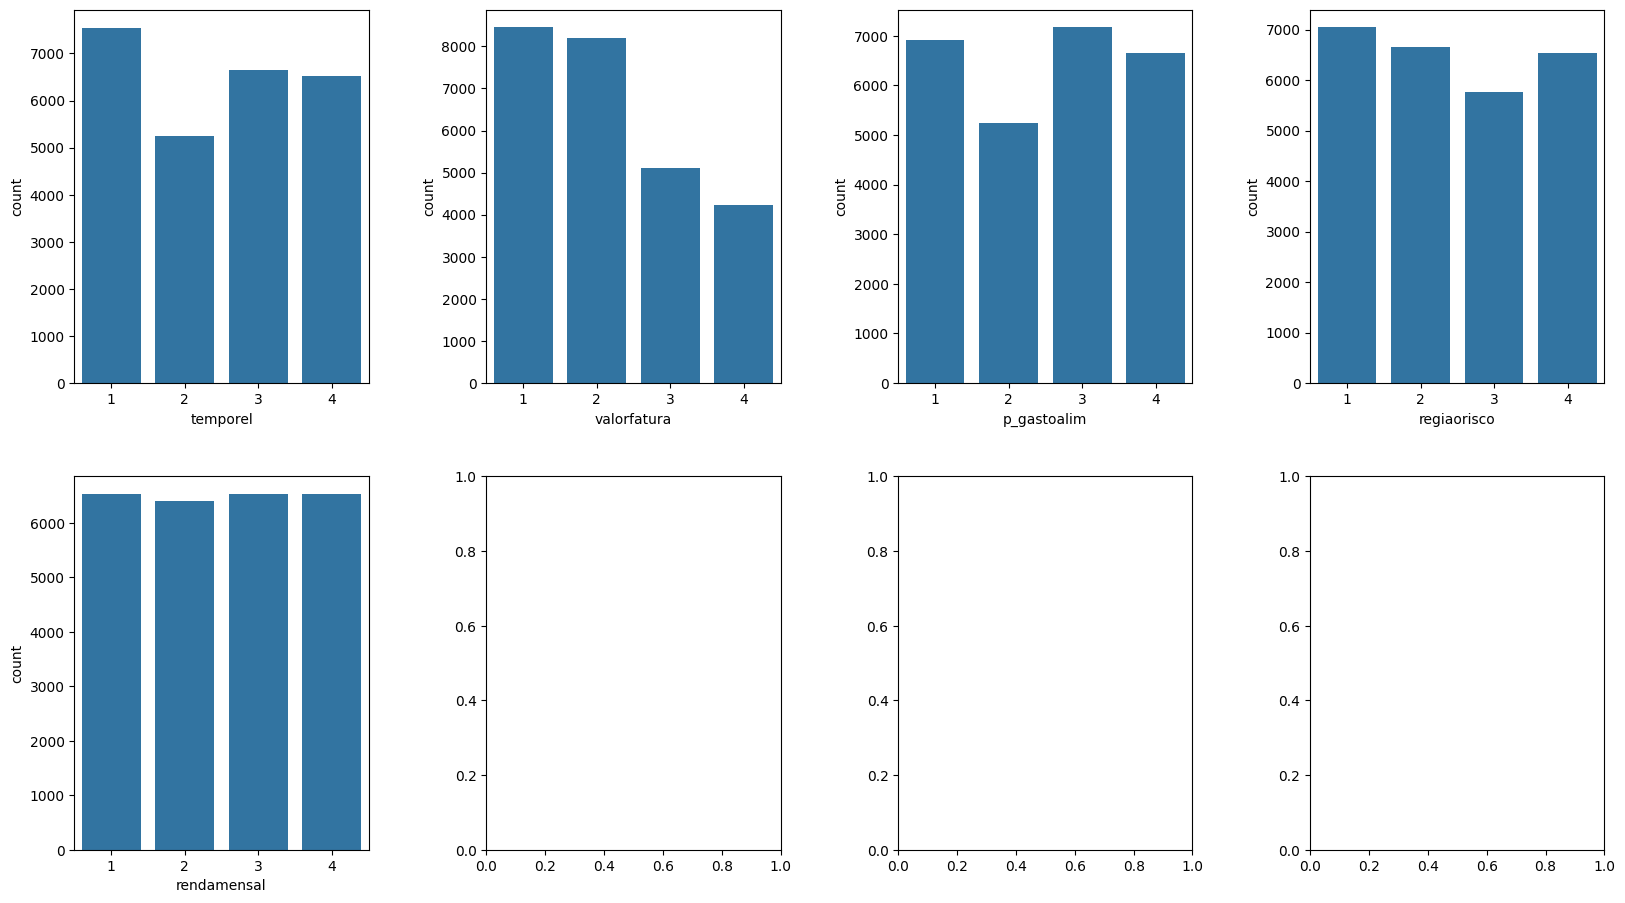

In [6]:
# Análise das variáveis qualitativas
features = var_cat
fig,axs=plt.subplots(nrows=2, ncols=4, figsize=(18,10))
for col, ax in zip(features[1:], axs.ravel()):
    x=df.loc[:, col]
    sns.countplot(x=x, ax=ax, orient='v')
    plt.subplots_adjust(top=0.92,bottom=0.08, left=0.10,right=0.95,hspace=0.25,wspace=0.4)

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_28466/2810771515.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')
/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_28466/2810771515.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')
/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_28466/2810771515.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')
/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipyker

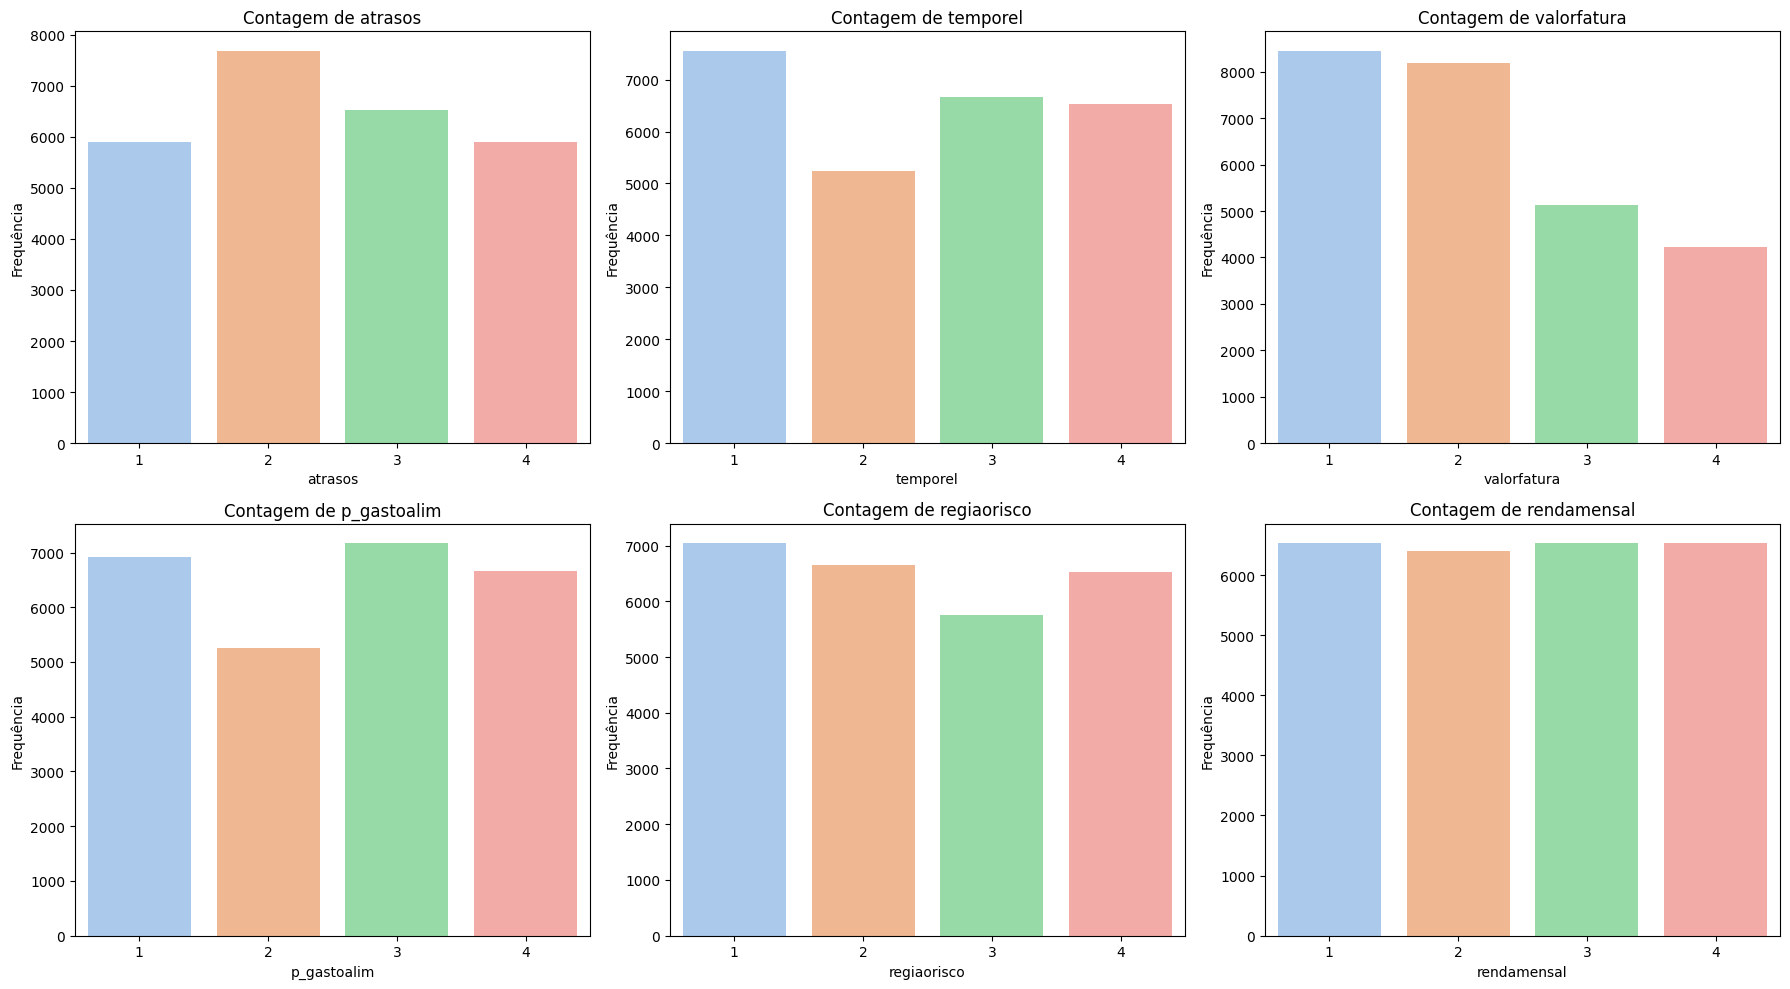

In [7]:
# Definir variáveis categóricas para visualização
categorical_cols = ['atrasos','temporel', 'valorfatura','p_gastoalim','regiaorisco','rendamensal']

# Criar gráficos de contagem
plt.figure(figsize=(18, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f'Contagem de {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

In [8]:
#mudar o formato da variável quantitativa para qualitativa
df['atrasos'] = df['atrasos'].astype(str)
df['temporel']= df['temporel'].astype(str)
df['valorfatura']= df['valorfatura'].astype(str)
df['temporel']= df['temporel'].astype(str)
df['p_gastoalim']= df['p_gastoalim'].astype(str)
df['regiaorisco']= df['regiaorisco'].astype(str)
df['rendamensal']= df['rendamensal'].astype(str)

In [9]:
# Tabela de frequência da variável Resposta do modelo
Resposta =pd.pivot_table(df, index='Resposta', values='cliente', aggfunc=np.count_nonzero)
Resposta['%'] = ((pd.pivot_table(df, index='Resposta', values = 'cliente', aggfunc=np.count_nonzero)/df['cliente'].count())*100).round(2)

In [10]:
# Tabela de frequência da variável Resposta do modelo
Resposta

,cliente,%
Resposta,,
0,13056,50.25
1,12928,49.75


In [11]:
# Criar variáveis dummies para cada variável qualitativa e excluir a primeira categoria de cada variável
var_dummies = pd.get_dummies(df[var_cat], drop_first = True, dtype=int)
print(var_dummies)


       atrasos_2  atrasos_3  atrasos_4  temporel_2  temporel_3  temporel_4  \
0              0          0          1           1           0           0   
1              0          0          0           0           0           1   
2              0          0          0           0           0           1   
3              1          0          0           1           0           0   
4              1          0          0           0           0           0   
...          ...        ...        ...         ...         ...         ...   
25979          0          1          0           0           0           1   
25980          0          1          0           0           1           0   
25981          0          0          1           0           1           0   
25982          1          0          0           0           0           1   
25983          0          1          0           0           1           0   

       valorfatura_2  valorfatura_3  valorfatura_4  p_gastoalim

In [12]:
# Fazer uma cópia do arquivo df e apagar as variáveis não utilizadas no modelo
df_copy  = df.copy()

df_copy= df_copy.drop(['cliente','atrasos','temporel','valorfatura', 'p_gastoalim','rendamensal','regiaorisco'], axis=1)

In [13]:
# Merge dos arquivos df e dummies
df = pd.concat([df_copy, var_dummies], axis=1)

print(df.head())

   Resposta  atrasos_2  atrasos_3  atrasos_4  temporel_2  temporel_3  \
0         1          0          0          1           1           0   
1         0          0          0          0           0           0   
2         0          0          0          0           0           0   
3         1          1          0          0           1           0   
4         0          1          0          0           0           0   

   temporel_4  valorfatura_2  valorfatura_3  valorfatura_4  p_gastoalim_2  \
0           0              0              0              1              0   
1           1              0              0              0              0   
2           1              0              1              0              1   
3           0              0              0              1              0   
4           0              0              0              1              0   

   p_gastoalim_3  p_gastoalim_4  regiaorisco_2  regiaorisco_3  regiaorisco_4  \
0              0        

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25984 entries, 0 to 25983
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Resposta       25984 non-null  int64
 1   atrasos_2      25984 non-null  int64
 2   atrasos_3      25984 non-null  int64
 3   atrasos_4      25984 non-null  int64
 4   temporel_2     25984 non-null  int64
 5   temporel_3     25984 non-null  int64
 6   temporel_4     25984 non-null  int64
 7   valorfatura_2  25984 non-null  int64
 8   valorfatura_3  25984 non-null  int64
 9   valorfatura_4  25984 non-null  int64
 10  p_gastoalim_2  25984 non-null  int64
 11  p_gastoalim_3  25984 non-null  int64
 12  p_gastoalim_4  25984 non-null  int64
 13  regiaorisco_2  25984 non-null  int64
 14  regiaorisco_3  25984 non-null  int64
 15  regiaorisco_4  25984 non-null  int64
 16  rendamensal_2  25984 non-null  int64
 17  rendamensal_3  25984 non-null  int64
 18  rendamensal_4  25984 non-null  int64
dtypes: i

### Modelo de Regressão Logística

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Dividir a amostra treino e teste
X = df.drop(['Resposta'],axis=1)
y = df['Resposta']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25984 entries, 0 to 25983
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   atrasos_2      25984 non-null  int64
 1   atrasos_3      25984 non-null  int64
 2   atrasos_4      25984 non-null  int64
 3   temporel_2     25984 non-null  int64
 4   temporel_3     25984 non-null  int64
 5   temporel_4     25984 non-null  int64
 6   valorfatura_2  25984 non-null  int64
 7   valorfatura_3  25984 non-null  int64
 8   valorfatura_4  25984 non-null  int64
 9   p_gastoalim_2  25984 non-null  int64
 10  p_gastoalim_3  25984 non-null  int64
 11  p_gastoalim_4  25984 non-null  int64
 12  regiaorisco_2  25984 non-null  int64
 13  regiaorisco_3  25984 non-null  int64
 14  regiaorisco_4  25984 non-null  int64
 15  rendamensal_2  25984 non-null  int64
 16  rendamensal_3  25984 non-null  int64
 17  rendamensal_4  25984 non-null  int64
dtypes: int64(18)
memory usage: 3.6 MB


In [18]:
y_train.describe()

count    18188.000000
mean         0.498845
std          0.500012
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Resposta, dtype: float64

In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18188 entries, 11081 to 13151
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   atrasos_2      18188 non-null  int64
 1   atrasos_3      18188 non-null  int64
 2   atrasos_4      18188 non-null  int64
 3   temporel_2     18188 non-null  int64
 4   temporel_3     18188 non-null  int64
 5   temporel_4     18188 non-null  int64
 6   valorfatura_2  18188 non-null  int64
 7   valorfatura_3  18188 non-null  int64
 8   valorfatura_4  18188 non-null  int64
 9   p_gastoalim_2  18188 non-null  int64
 10  p_gastoalim_3  18188 non-null  int64
 11  p_gastoalim_4  18188 non-null  int64
 12  regiaorisco_2  18188 non-null  int64
 13  regiaorisco_3  18188 non-null  int64
 14  regiaorisco_4  18188 non-null  int64
 15  rendamensal_2  18188 non-null  int64
 16  rendamensal_3  18188 non-null  int64
 17  rendamensal_4  18188 non-null  int64
dtypes: int64(18)
memory usage: 2.6 MB


In [20]:
# Importar a biblioteca da Regressão Logística
from sklearn.linear_model import LogisticRegression

In [21]:
# Resulto da Regressão logística
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.466785
         Iterations 6
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: Resposta         Pseudo R-squared: 0.327     
Date:               2025-02-10 21:47 AIC:              17015.7709
No. Observations:   18188            BIC:              17156.3242
Df Model:           17               Log-Likelihood:   -8489.9   
Df Residuals:       18170            LL-Null:          -12607.   
Converged:          1.0000           LLR p-value:      0.0000    
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
atrasos_2         1.2057   0.0517  23.3123 0.0000  1.1043  1.3070
atrasos_3         2.6948   0.0562  47.9077 0.0000  2.5845  2.8050


### Cálculo da probabilidade


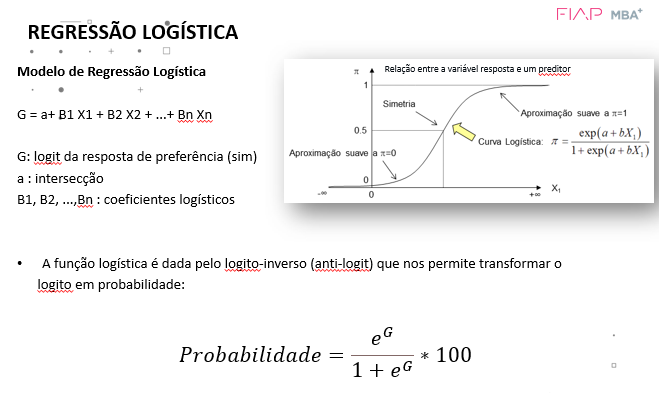

In [22]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [23]:
# Acuracia do modelo na amostra de treino
y_pred_treino = logmodel.predict(X_train)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logmodel.score(X_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.80


In [24]:
# Classificacao do modelo na amostra teste
y_pred_valid = logmodel.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logmodel.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


### Ponte de corte da probabilidade
### Usar a probabilidade estimada pelo modelo para criar a previsão do modelo em uma variável qualitativa do tipo 0 ou 1
### Utilize o ponto de corte para classificar os clientes em 0 ou 1 (previsão do modelo)

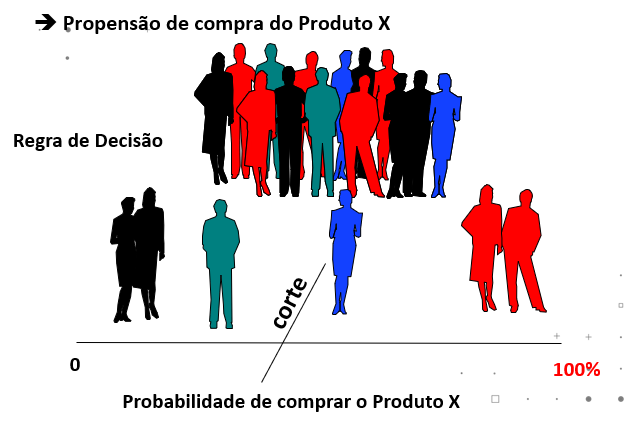

### Avaliação do acerto da Regressão Logística
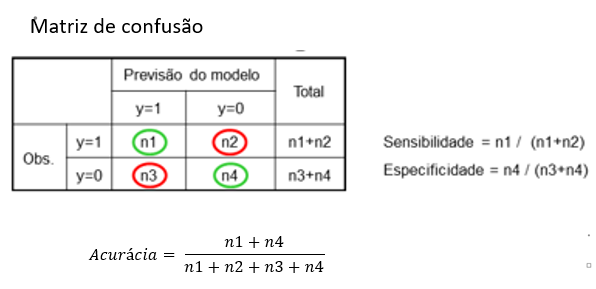

### Precision score = n1/(n1+n2)
### Recall score = n1/(n1+n3)
### F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score)

link: https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/

### Avaliação do modelo na amostra treino

In [25]:
from sklearn.metrics import confusion_matrix

# Matriz de confusão na amostra treino
y_pred = logmodel.predict(X_train)
confusion_matrix = confusion_matrix(y_train, y_pred)
print(confusion_matrix)

[[7460 1655]
 [1961 7112]]


<Axes: xlabel='Predicted', ylabel='Actual'>

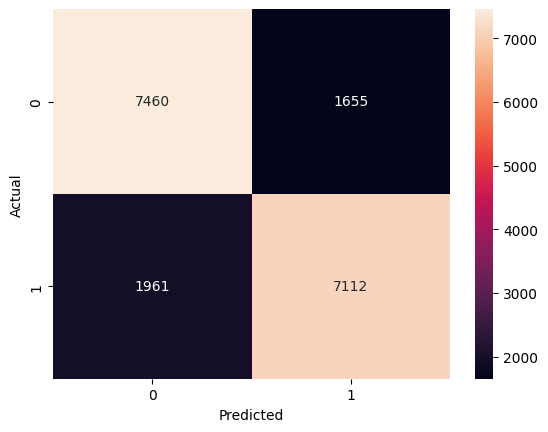

In [26]:
# Matriz de confusão na amostra treino
confusion_matrix = pd.crosstab(y_train, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [27]:
from sklearn import metrics

print('Acurácia: ',metrics.accuracy_score(y_train, y_pred))
plt.show()

Acurácia:  0.8011875962172861


In [28]:
from sklearn.metrics import classification_report

In [29]:
predictions = logmodel.predict(X_train)

In [30]:
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      9115
           1       0.81      0.78      0.80      9073

    accuracy                           0.80     18188
   macro avg       0.80      0.80      0.80     18188
weighted avg       0.80      0.80      0.80     18188



### Curva ROC

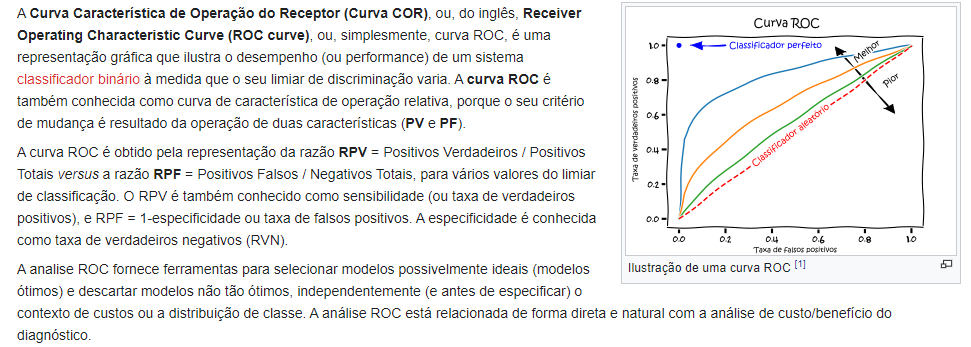

Fonte: https://pt.wikipedia.org/wiki/Característica_de_Operação_do_Receptor

### Matriz de confusão

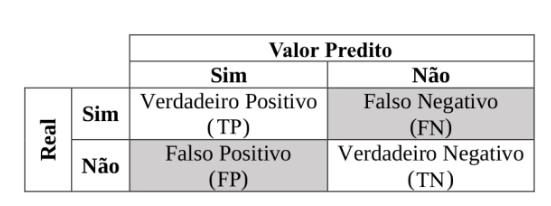

##### Fonte:https://diegonogare.net/2020/04/performance-de-machine-learning-matriz-de-confusao/

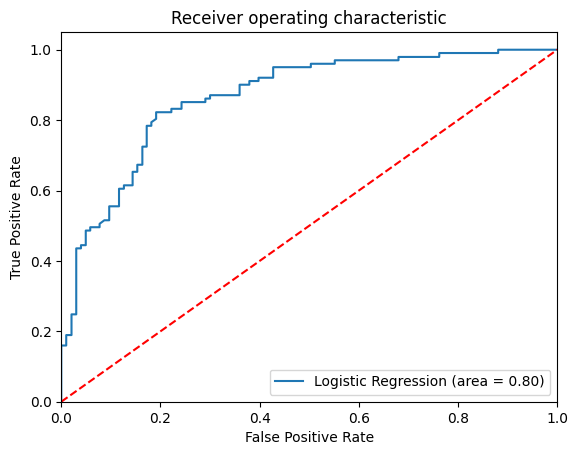

In [31]:
# Curva Receiver operating characteristic (ROC)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_train, logmodel.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, logmodel.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Avaliação do modelo na amostra teste

In [32]:
# Aplicar o modelo na amostra teste
predictions_test = logmodel.predict(X_test)

In [33]:
# Matriz de confusão na amostra treino

from sklearn.metrics import confusion_matrix

y_pred = logmodel.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[3164  777]
 [ 855 3000]]


<Axes: xlabel='Predicted', ylabel='Actual'>

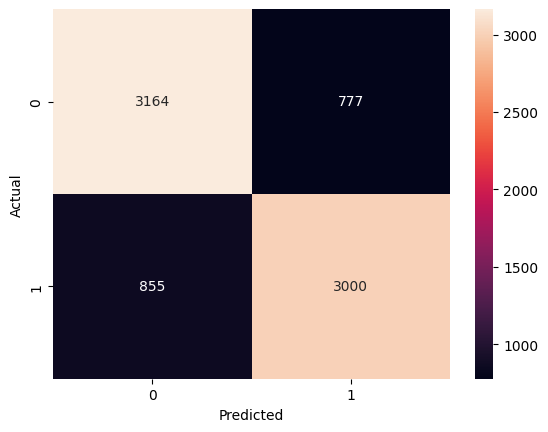

In [34]:
# Matriz de confusão na amostra de validacao
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [35]:
print(classification_report(y_test,predictions_test))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      3941
           1       0.79      0.78      0.79      3855

    accuracy                           0.79      7796
   macro avg       0.79      0.79      0.79      7796
weighted avg       0.79      0.79      0.79      7796



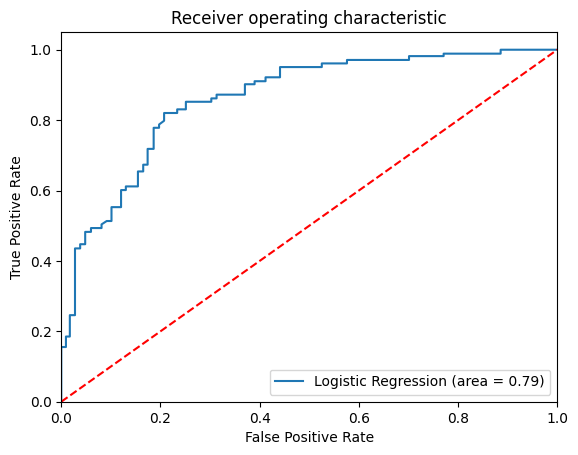

In [36]:
# Curva ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()